In [176]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
from datetime import datetime as dt

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [159]:
def get_data(query):
    import config
    config=config.config_sqlserver()
    conn = pyodbc.connect(*config)

    c=conn.cursor()
    c.execute(query)
    data=c.fetchall()
    conn.close()
    return data

In [160]:
ticker_list = get_data("Select distinct ticker from us_stage1")
stock_list = []
for l in ticker_list:
    stock_list.append(l[0])

In [161]:
#Create data frame
#Use three stocks to save time
import config
config=config.config_sqlserver()
conn = pyodbc.connect(*config)

stock_list = ['AAPL','GOOG','AMZN']
for stock in stock_list:
    sql = "SELECT * from us_stage1 where ticker= '%s'" % stock
    globals()[stock] = pd.read_sql(sql, conn)
conn.close()

In [201]:
ma_day = [5, 10,20,30]
for stock in stock_list:
    for ma in ma_day:
        colums_name='MA %s Days' % (str(ma))
        stock_col = globals()[stock]
        stock_col[colums_name] = Series.rolling(stock_col['adj_close'],ma).mean()

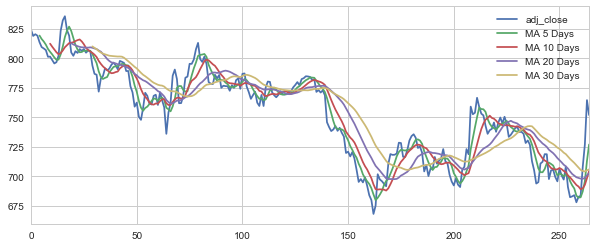

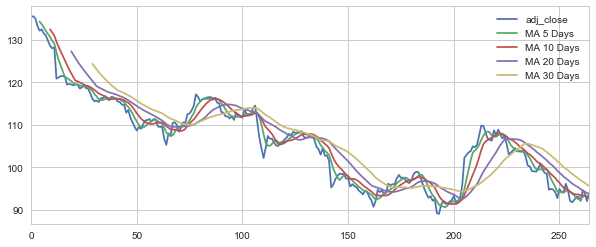

In [203]:
GOOG_Sub = GOOG[['adj_close','MA 5 Days','MA 10 Days','MA 20 Days','MA 30 Days']][(GOOG['date']>=dt(2016,2,1).date())]
GOOG_Sub[['adj_close','MA 5 Days','MA 10 Days','MA 20 Days','MA 30 Days']].plot(figsize=(10,4))
AAPL[['adj_close','MA 5 Days','MA 10 Days','MA 20 Days','MA 30 Days']][(AAPL['date']>=dt(2016,2,1).date())].plot(figsize=(10,4))

In [204]:
GOOG

,ticker,date,open,high,low,close,volume,adj_close,MA 5 Days,MA 10 Days,MA 20 Days,MA 30 Days
0,GOOG,2017-02-16,819.929993,824.400024,818.979980,824.159973,1281700.0,824.159973,NaN,NaN,NaN,NaN
1,GOOG,2017-02-15,819.359985,823.000000,818.469971,818.979980,1304000.0,818.979980,NaN,NaN,NaN,NaN
2,GOOG,2017-02-14,819.000000,823.000000,816.000000,820.450012,1053600.0,820.450012,NaN,NaN,NaN,NaN
3,GOOG,2017-02-13,816.000000,820.958984,815.489990,819.239990,1198100.0,819.239990,NaN,NaN,NaN,NaN
4,GOOG,2017-02-10,811.700012,815.250000,809.780029,813.669983,1129100.0,813.669983,819.299988,NaN,NaN,NaN
5,GOOG,2017-02-09,809.510010,810.659973,804.539978,809.559998,989700.0,809.559998,816.379993,NaN,NaN,NaN
6,GOOG,2017-02-08,807.000000,811.840027,803.190002,808.380005,1155300.0,808.380005,814.259998,NaN,NaN,NaN
7,GOOG,2017-02-07,803.989990,810.500000,801.780029,806.969971,1235200.0,806.969971,811.563989,NaN,NaN,NaN
8,GOOG,2017-02-06,799.700012,801.669983,795.250000,801.340027,1174200.0,801.340027,807.983997,NaN,NaN,NaN
9,GOOG,2017-02-03,802.989990,806.000000,800.369995,801.489990,1460400.0,801.489990,805.547998,812.423993,NaN,NaN


In [246]:
#get current price rolling 5 days, 10 days ... price
r0 = GOOG[GOOG['date'] == GOOG['date'].max()]['adj_close']
r5_nn = GOOG[(GOOG['MA 5 Days'].notnull())]
r5 = r5_nn[(r5_nn['date'] == r5_nn['date'].max())]['adj_close']
r10_nn = GOOG[(GOOG['MA 10 Days'].notnull())]
r10 = r10_nn[(r10_nn['date'] == r10_nn['date'].max())]['adj_close']
r20_nn = GOOG[(GOOG['MA 20 Days'].notnull())]
r20 = r20_nn[(r20_nn['date'] == r20_nn['date'].max())]['adj_close']
r30_nn = GOOG[(GOOG['MA 30 Days'].notnull())]
r30 = r30_nn[(r30_nn['date'] == r30_nn['date'].max())]['adj_close']

check_ma = (r5>r10) & (r10>r20) & (r20>r30)

In [247]:
check_ma

4    False
Name: adj_close, dtype: bool

In [1]:
#Construct CCI - Reference https://www.quantinsti.com/blog/build-technical-indicators-in-python/
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI') 
 data = data.join(CCI) 
 return data

# Compute the Commodity Channel Index(CCI) for NIFTY based on the 20-day Moving average
n = 20
NIFTY_CCI = CCI(data, n)
CCI = NIFTY_CCI['CCI']

NameError: name 'data' is not defined

In [ ]:
#Construct bollinger band
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

sp['ave'], sp['upper'], sp['lower'] = bbands(sp.Close, length=30, numsd=1)
sp= sp[-200:]
sp.plot()